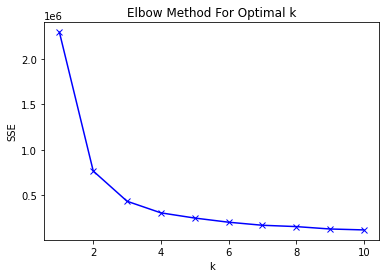

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import matplotlib.pyplot as plt
import numpy.linalg as LA
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits import mplot3d
from PIL import Image


data = pd.read_csv("../data/image_data.csv",sep=",", header=0) # reads in the data from a file
r_mode = data["r_mode"]
g_mode = data["g_mode"]
b_mode = data["b_mode"]
filenames = data["filename"]
x_map = {}
x = [] # list to hold the data point locations
for i in range(len(r_mode)):
    x1 = r_mode[i]
    x2 = g_mode[i]
    x3 = b_mode[i]
    x_map[f"{x1},{x2},{x3}"] = filenames[i] # only gets the data that we want to us
    x.append([x1,x2,x3])


# Elbow method to find the optimal number of clusters
sse = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sse.append(km.inertia_)

num_C = 5          # number of clusters
num_inits = 10      # number of times k-means is ran
num_max_iter = 300  # number of iterations on a single k-means run 

# Plot the elbow graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, sse, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('SSE')
ax.set_title('Elbow Method For Optimal k')
plt.show()

In [63]:
num_C = 3        # number of clusters
num_inits = 10      # number of times k-means is ran
num_max_iter = 300  # number of iterations on a single k-means run 

km = KMeans(n_clusters=num_C, n_init=num_inits, max_iter=num_max_iter)
y_km = km.fit_predict(x)        # returns a list of what data point belongs in what cluster
c_centers = km.cluster_centers_ # a list of cluster centers
print(c_centers)

[[180.61512898 156.58799558 127.51537314]
 [ 75.58682648  50.92050552  35.54832097]
 [133.66525809  98.06984387  67.4972742 ]]


In [64]:
k_clusters = {}
for i in range(num_C): # creates a dictionary where each key is a number of clusters
     k_clusters[str(i)] = [[],[], []]
for i in range(num_C):  # loops over the number of clusters
    for j in range(len(y_km)):  # loops over every data point
        if (y_km[j] == i):  # gets every point for each cluster
            n_x, n_y, n_z = x[j]
            lists = k_clusters[str(i)]
            lists[0].append(n_x)
            lists[1].append(n_y)
            lists[2].append(n_z)

{'0': [[187.05056, 177.553296, 169.206256, 142.968496, 172.158688, 179.390864, 221.902, 195.940368, 145.408752, 211.497328, 184.761488, 185.051664, 179.539472, 207.981904, 166.233024, 152.29048, 173.882448, 161.874736, 173.895792, 203.118016, 151.380272, 202.841008, 169.011264, 157.432032, 179.105888, 185.040176, 179.174704, 186.361856, 192.659072, 171.002304, 166.214656, 159.069536, 160.72376, 203.232288, 202.963296, 192.746672, 200.230096, 209.670224, 143.963536, 189.443104, 190.283856, 181.764864, 177.62768, 148.863056, 158.410592, 191.625696, 196.58448, 181.756576, 210.371728, 171.938496, 186.108576, 170.376128, 173.432448, 172.760688, 192.740512, 188.262272, 160.599312, 192.155712, 164.3628, 160.73296, 209.62832, 143.551136, 196.590192, 170.388736, 192.694384, 170.704336, 175.219728, 173.245376, 163.562768, 201.427888, 163.41776, 179.816256, 203.118016, 170.97024, 201.46088, 174.48368, 195.940368, 185.041776, 157.822752, 181.211024, 180.246592, 166.6608, 202.84392, 186.502528, 206

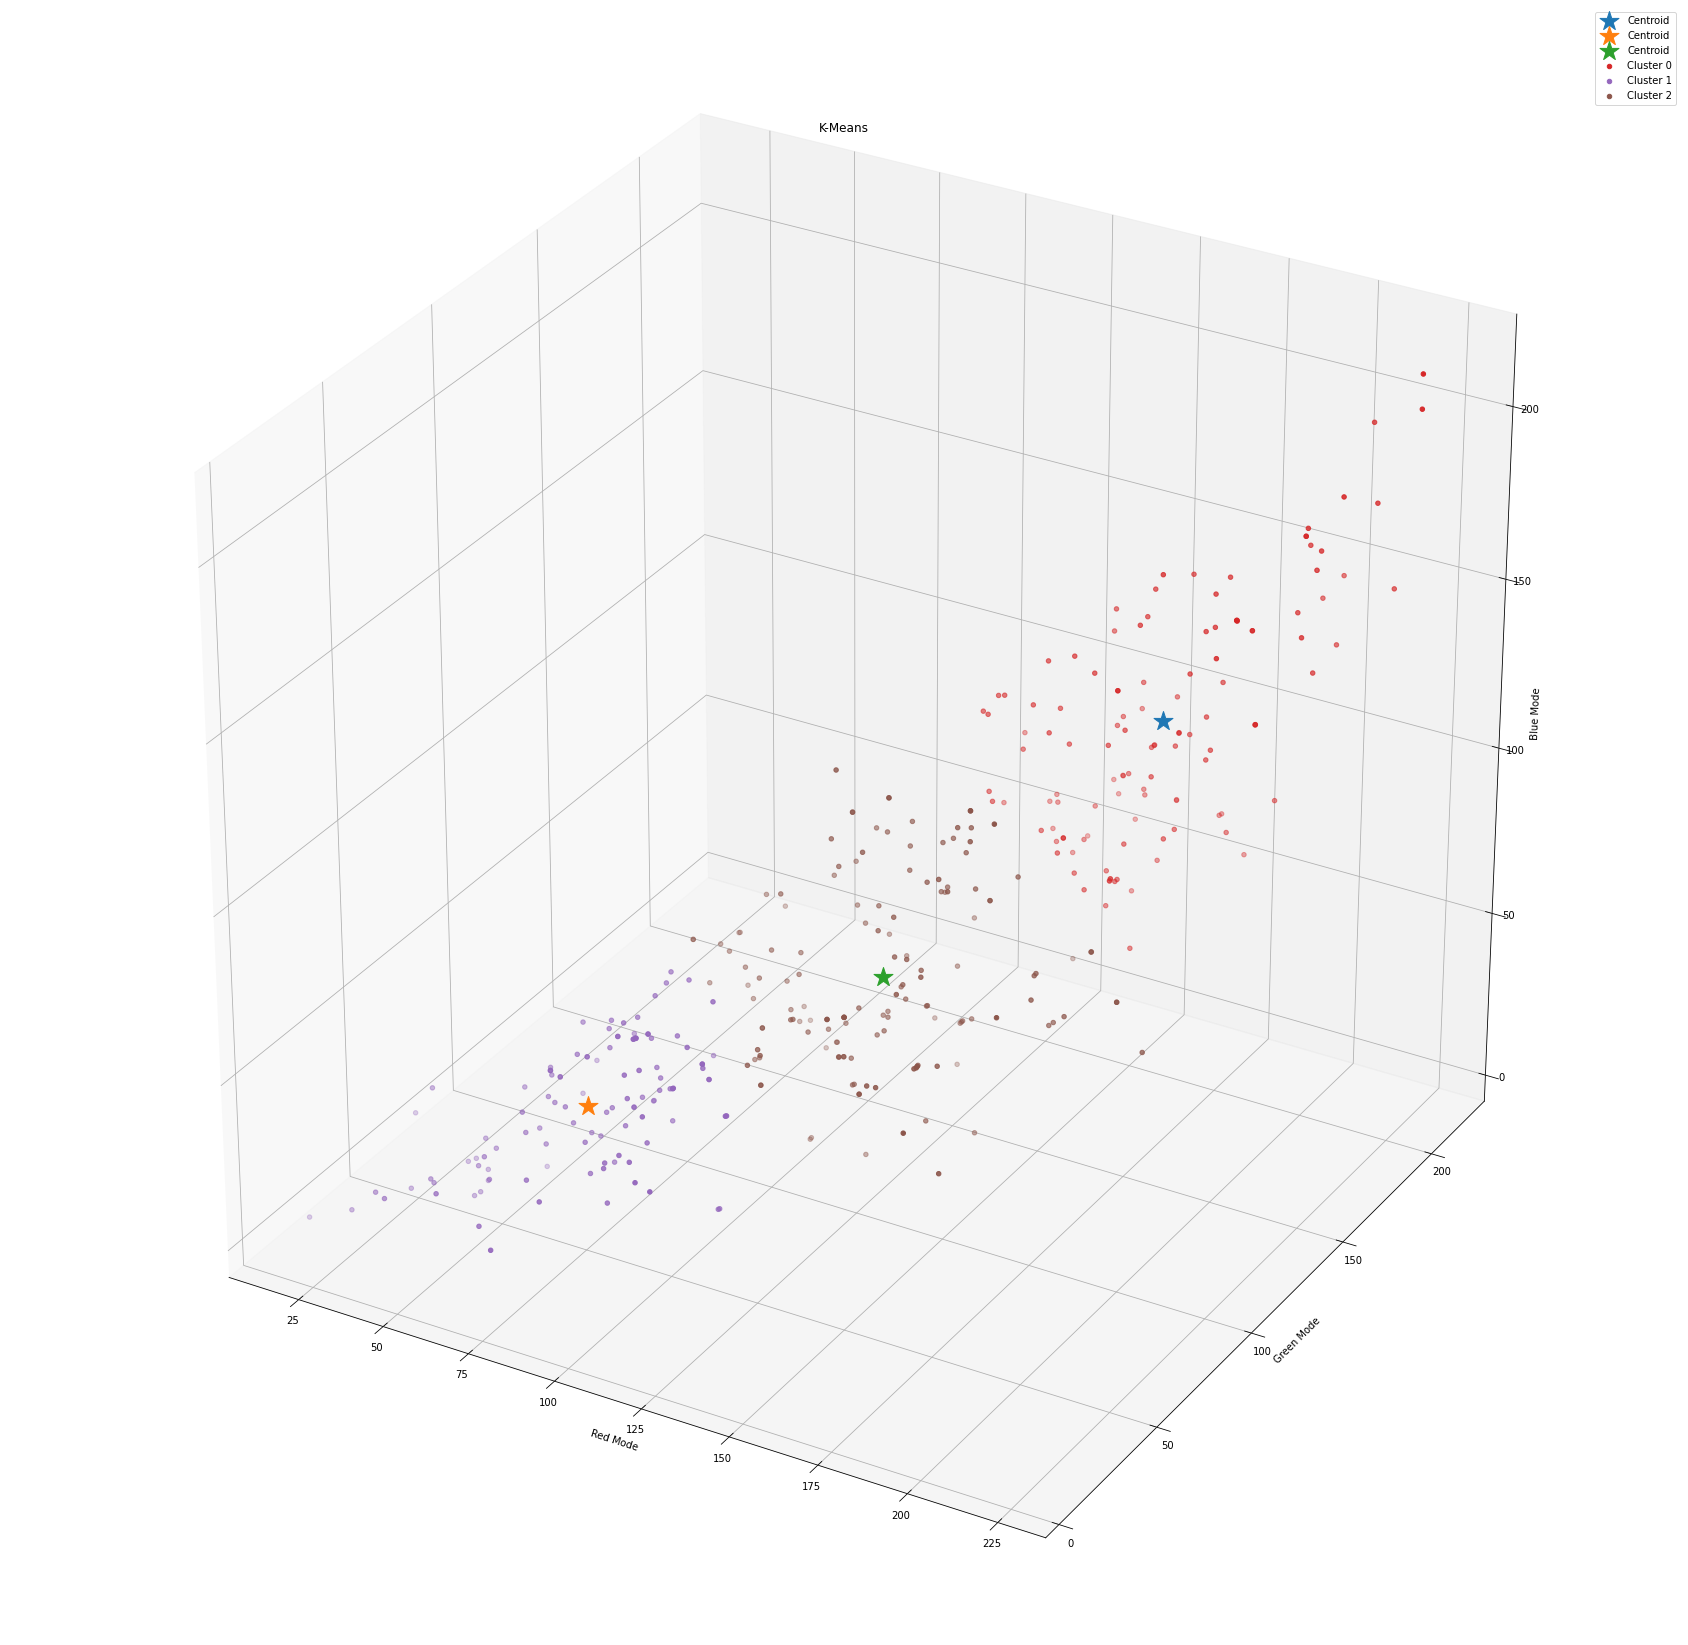

In [65]:

figure = plt.figure(figsize=(30, 30)) # creates a new figure object
ax = figure.add_subplot(111, projection='3d')  # adds a 3D subplot

for i in c_centers:  # plots the center of the clusters
    x, y, z = i
    ax.scatter(x, y, z, marker="*", s=400, label="Centroid")

for i in k_clusters:  # plots each cluster
    x, y, z = k_clusters[i]
    ax.scatter(x, y, z, label="Cluster " + str(i))

print(k_clusters)


ax.set_title("K-Means")
ax.set_xlabel("Red Mode")
ax.set_ylabel("Green Mode")
ax.set_zlabel("Blue Mode")
ax.legend()
plt.show()

In [66]:
# randomly sample 3 points from each cluster in k_clusters and save them
# to a new dictionary called k_clusters_sampled
k_clusters_sampled = {}
for i in k_clusters:
    x, y, z = k_clusters[i]
    x_sampled = []
    y_sampled = []
    z_sampled = []
    for j in range(5):
        index = np.random.randint(0, len(x))
        x_sampled.append(x[index])
        y_sampled.append(y[index])
        z_sampled.append(z[index])
    k_clusters_sampled[i] = [x_sampled, y_sampled, z_sampled]

print(k_clusters_sampled)

    

{'0': [[188.262272, 159.069536, 174.48368, 152.29048, 173.882448], [168.988752, 149.841968, 166.97736, 141.03376, 148.584016], [151.179216, 143.772992, 163.60736, 131.858448, 113.523472]], '1': [[85.489904, 61.153792, 85.25128, 84.575936, 58.400832], [52.65144, 21.43408, 66.139008, 74.84608, 31.189136], [31.689712, 10.40104, 50.862784, 62.737856, 18.4452]], '2': [[120.752, 167.589776, 113.56752, 125.516688, 111.44768], [83.066272, 115.686896, 71.56616, 103.697712, 74.911472], [54.757936, 69.574864, 51.5192, 78.124752, 48.443376]]}


Cluster 0
../images/renamed/img_168.png


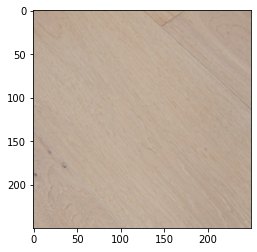

../images/renamed/img_85.png


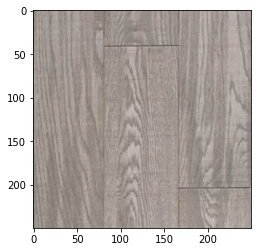

../images/renamed/img_229.png


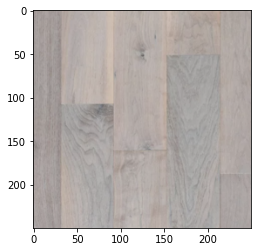

../images/renamed/img_44.png


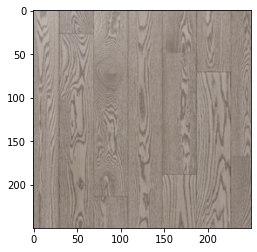

../images/renamed/img_45.png


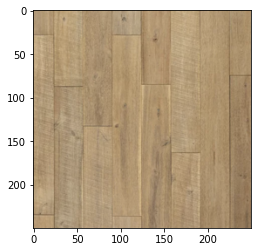

Cluster 1
../images/renamed/img_323.png


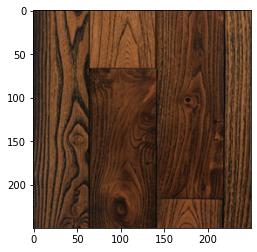

../images/renamed/img_117.png


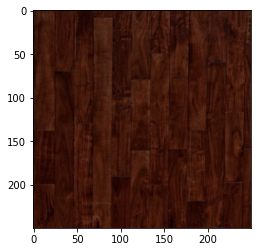

../images/renamed/img_112.png


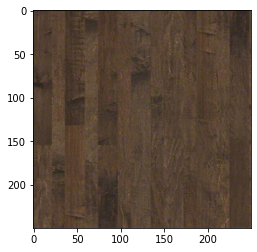

../images/renamed/img_103.png


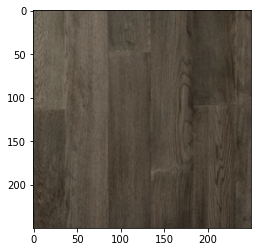

../images/renamed/img_81.png


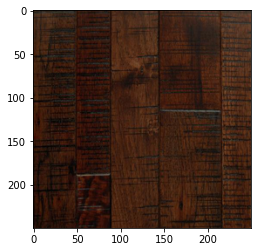

Cluster 2
../images/renamed/img_9.png


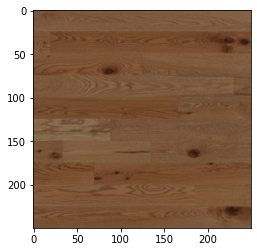

../images/renamed/img_199.png


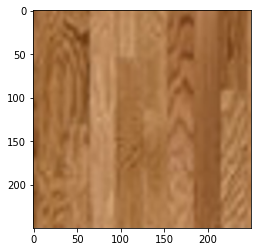

../images/renamed/img_102.png


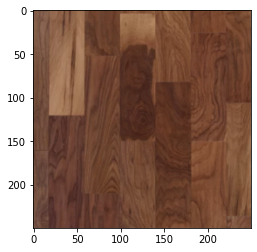

../images/renamed/img_64.png


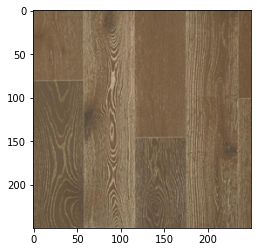

../images/renamed/img_375.png


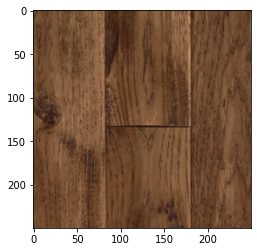

In [67]:
import os
for j in range(num_C):
    print(f"Cluster {j}")
    x_vals = k_clusters_sampled[str(j)][0]
    y_vals = k_clusters_sampled[str(j)][1]
    z_vals = k_clusters_sampled[str(j)][2]
    for i in range(len(x_vals)):
        filename = x_map[f"{x_vals[i]},{y_vals[i]},{z_vals[i]}"]
        print(filename)
        image = Image.open(filename).resize((250, 250))

        plt.imshow(image)
        plt.show()